In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D

## Ejemplo en 2d

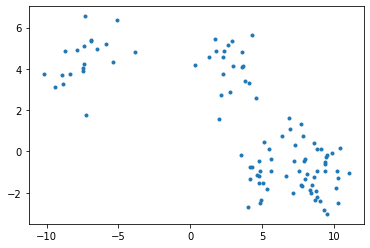

In [6]:
X,y = make_blobs(n_samples = 100, centers=5, n_features = 2)
plt.plot(X[:,0],X[:,1],'.')
plt.show()

In [11]:
model = KMeans(n_clusters=3)
model.fit(X)
print(model.cluster_centers_)
grupo = model.predict(X)
print(grupo)

[[-7.35014266  4.4672218 ]
 [ 7.44942968 -0.94645784]
 [ 2.74427279  4.10351565]]
[2 2 2 1 1 1 1 0 1 0 2 1 1 1 1 1 2 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 2
 1 2 1 2 1 0 1 1 2 1 1 1 1 1 0 1 2 1 1 1 1 1 2 1 0 1 2 2 2 1 2 0 1 0 2 1 0
 2 2 1 0 1 1 1 1 1 0 1 0 2 2 0 0 0 1 0 1 1 0 1 1 1 1]


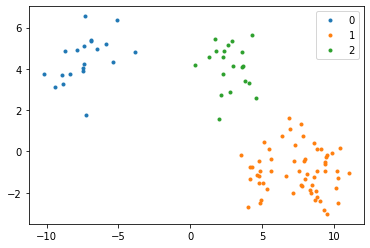

In [12]:
plt.plot(X[grupo==0,0],X[grupo==0,1],'.',label='0')
plt.plot(X[grupo==1,0],X[grupo==1,1],'.',label='1')
plt.plot(X[grupo==2,0],X[grupo==2,1],'.',label='2')
plt.legend()
plt.show()

## Ejemplo con una imagen

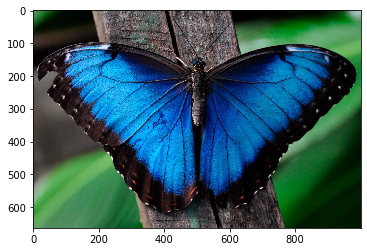

In [41]:
img = cv2.imread('mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.figure()
plt.imshow(img)
plt.show()

(664, 1000, 3)


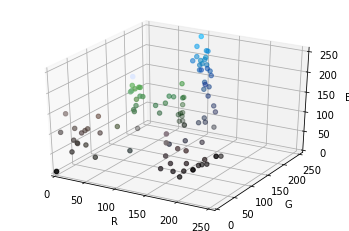

In [42]:
print(img.shape)

nrows,ncols,nch = img.shape

# Vectorizar la imagen
Ximg = np.reshape(img,(nrows*ncols,3))
Ximg_hsv = np.reshape(img_hsv,(nrows*ncols,3))

idx = np.random.permutation(nrows*ncols)
idx = idx[:100]

# Graficar
fig = plt.figure()
ax = fig.gca(projection='3d')
R = Ximg_hsv[idx,0]
G = Ximg_hsv[idx,1]
B = Ximg_hsv[idx,2]
ax.scatter(R, G, B, c=Ximg[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [43]:
model = KMeans(n_clusters=10)
model.fit(Ximg_hsv)
print(model.cluster_centers_)
g = model.predict(Ximg_hsv)
print(g[:100])

[[101.06848757 240.04142114 218.06169316]
 [151.47550482 114.23663821  19.64685111]
 [ 13.79037777  33.74546541  83.77185274]
 [129.01089399 234.91305711  32.13208632]
 [ 64.74737715 116.28039349 156.50446293]
 [ 54.93548569 245.99727305  32.24974921]
 [156.84007627  32.72250004  81.81589202]
 [ 18.38572253 117.66912956  33.97063751]
 [100.41682022 247.29277448 144.91187224]
 [ 72.30767892 176.39739322 105.7523337 ]]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 5 9 9 9 9 9 9 9 9 9 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [44]:
print(Ximg_hsv[:10])
Ximg_hsv[ g==0 ,:] = model.cluster_centers_[0]
Ximg_hsv[ g==1 ,:] = model.cluster_centers_[1]
Ximg_hsv[ g==2 ,:] = model.cluster_centers_[2]
print(Ximg_hsv[:10])

[[ 62 125 149]
 [ 62 127 150]
 [ 62 127 150]
 [ 63 133 153]
 [ 64 134 152]
 [ 65 139 152]
 [ 65 145 151]
 [ 65 148 150]
 [ 67 153 150]
 [ 67 149 154]]
[[ 62 125 149]
 [ 62 127 150]
 [ 62 127 150]
 [ 63 133 153]
 [ 64 134 152]
 [ 65 139 152]
 [ 65 145 151]
 [ 65 148 150]
 [ 67 153 150]
 [ 67 149 154]]


In [45]:
print('Ximg_hsv',Ximg_hsv.shape)
img_hsv = np.reshape(Ximg_hsv,(nrows,ncols,nch))
print('img_hsv',img_hsv.shape)

Ximg_hsv (664000, 3)
img_hsv (664, 1000, 3)


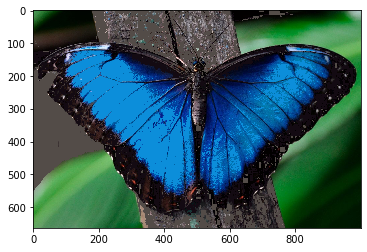

In [46]:
img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(img)
plt.show()